## Preparing datasets for Housing Demand Indicators and Average Price in London for Inner, Outer and City region:

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
outerlondon_df = pd.read_csv('../../Datasets/02_clean_data_files/landregistry_outer_london_monthly_stats.csv')
innerlondon_df = pd.read_csv('../../Datasets/02_clean_data_files/landregistry_inner_london_monthly_stats.csv')
cityoflondon_df = pd.read_csv('../../Datasets/02_clean_data_files/landregistry_city_of_london_monthly_stats.csv')


In [72]:
def clean_lr_df(data):
    data.rename(columns={'Name': 'Region'}, inplace=True)
    data['Pivotable date'] = pd.to_datetime(data['Pivotable date'], format='%Y-%m-%d')


In [73]:
clean_lr_df(innerlondon_df)
clean_lr_df(outerlondon_df)
clean_lr_df(cityoflondon_df)

#### For Inner London:

In [74]:
columns = ['Region', 'Average price All property types', 'Sales volume', 'Sales volume New build', 'Average price New build', 'Pivotable date']
innerlondon_demand = innerlondon_df.loc[:, columns].copy()
innerlondon_demand

,Region,Average price All property types,Sales volume,Sales volume New build,Average price New build,Pivotable date
0,Inner London,264926,4459,474,274453,2006-01-01
1,Inner London,265721,4352,591,275926,2006-02-01
2,Inner London,267544,5587,708,276404,2006-03-01
3,Inner London,270595,5014,477,281395,2006-04-01
4,Inner London,275878,5366,524,285642,2006-05-01
...,...,...,...,...,...,...
199,Inner London,632014,3384,151,623379,2022-08-01
200,Inner London,636692,3308,120,644363,2022-09-01
201,Inner London,631250,3014,128,647125,2022-10-01
202,Inner London,627294,2827,69,655103,2022-11-01


In [75]:
innerlondon_demand['Year'] = innerlondon_demand['Pivotable date'].dt.year
innerlondon_demand.drop(['Pivotable date'], axis=1, inplace=True)

In [76]:
innerlondon_demand = innerlondon_demand.groupby(['Region', 'Year']).agg(Average_Price=('Average price All property types', 'mean'), Total_Sales=('Sales volume', 'sum'), Total_Sales_New_Builds=('Sales volume New build', 'sum'), Average_Price_New_Builds=('Average price New build', 'mean')).reset_index().round()
innerlondon_demand

,Region,Year,Average_Price,Total_Sales,Total_Sales_New_Builds,Average_Price_New_Builds
0,Inner London,2006,281009.0,68217,6463,287815.0
1,Inner London,2007,331026.0,63955,3946,332907.0
2,Inner London,2008,335259.0,31370,3906,339911.0
3,Inner London,2009,304114.0,30719,4292,295319.0
4,Inner London,2010,340155.0,39065,4508,318747.0
5,Inner London,2011,353602.0,38181,3390,339733.0
6,Inner London,2012,374104.0,39743,4612,346454.0
7,Inner London,2013,414744.0,47555,5398,388015.0
8,Inner London,2014,491868.0,48901,5770,466923.0
9,Inner London,2015,533712.0,44714,6135,510289.0


#### For Outer London:

In [77]:
columns = ['Region', 'Average price All property types', 'Sales volume', 'Sales volume New build', 'Average price New build', 'Pivotable date']
outerlondon_demand = outerlondon_df.loc[:, columns].copy()
outerlondon_demand

,Region,Average price All property types,Sales volume,Sales volume New build,Average price New build,Pivotable date
0,Outer London,225564,6403,379,234880,2006-01-01
1,Outer London,226449,6533,377,236842,2006-02-01
2,Outer London,227024,8395,547,236599,2006-03-01
3,Outer London,228292,6939,384,238234,2006-04-01
4,Outer London,229832,7983,455,238878,2006-05-01
...,...,...,...,...,...,...
199,Outer London,490401,4844,152,474590,2022-08-01
200,Outer London,494685,4865,114,489773,2022-09-01
201,Outer London,495583,4562,117,491342,2022-10-01
202,Outer London,494084,4645,221,495972,2022-11-01


In [78]:
outerlondon_demand['Year'] = outerlondon_demand['Pivotable date'].dt.year


In [79]:
outerlondon_demand.drop(['Pivotable date'], axis=1, inplace=True)
outerlondon_demand

,Region,Average price All property types,Sales volume,Sales volume New build,Average price New build,Year
0,Outer London,225564,6403,379,234880,2006
1,Outer London,226449,6533,377,236842,2006
2,Outer London,227024,8395,547,236599,2006
3,Outer London,228292,6939,384,238234,2006
4,Outer London,229832,7983,455,238878,2006
...,...,...,...,...,...,...
199,Outer London,490401,4844,152,474590,2022
200,Outer London,494685,4865,114,489773,2022
201,Outer London,495583,4562,117,491342,2022
202,Outer London,494084,4645,221,495972,2022


In [80]:
outerlondon_demand = outerlondon_demand.groupby(['Region', 'Year']).agg(Average_Price=('Average price All property types', 'mean'), Total_Sales=('Sales volume', 'sum'), Total_Sales_New_Builds=('Sales volume New build', 'sum'), Average_Price_New_Builds=('Average price New build', 'mean')).reset_index().round()
outerlondon_demand


,Region,Year,Average_Price,Total_Sales,Total_Sales_New_Builds,Average_Price_New_Builds
0,Outer London,2006,233880.0,103233,6005,240640.0
1,Outer London,2007,261401.0,101616,4834,262935.0
2,Outer London,2008,262747.0,49551,4284,266999.0
3,Outer London,2009,233629.0,44512,3308,234470.0
4,Outer London,2010,255640.0,52868,3039,244934.0
5,Outer London,2011,258968.0,51860,3224,255928.0
6,Outer London,2012,267312.0,54116,4774,261916.0
7,Outer London,2013,283136.0,64418,5654,277677.0
8,Outer London,2014,328554.0,73048,6074,323229.0
9,Outer London,2015,366447.0,71858,7205,360676.0


#### For City of London:

In [81]:
columns = ['Region', 'Average price All property types', 'Sales volume', 'Sales volume New build', 'Average price New build', 'Pivotable date']
cityoflondon_demand = cityoflondon_df.loc[:, columns].copy()
cityoflondon_demand

,Region,Average price All property types,Sales volume,Sales volume New build,Average price New build,Pivotable date
0,City of London,316121,19,0.0,345805.0,2006-01-01
1,City of London,323653,17,0.0,354413.0,2006-02-01
2,City of London,325106,28,1.0,357182.0,2006-03-01
3,City of London,319580,24,1.0,352690.0,2006-04-01
4,City of London,313126,22,0.0,344761.0,2006-05-01
...,...,...,...,...,...,...
199,City of London,895191,19,NaN,NaN,2022-08-01
200,City of London,891856,17,NaN,NaN,2022-09-01
201,City of London,910919,11,NaN,NaN,2022-10-01
202,City of London,952455,7,NaN,NaN,2022-11-01


In [82]:
cityoflondon_demand['Year'] = cityoflondon_demand['Pivotable date'].dt.year

In [83]:
cityoflondon_demand.drop(['Pivotable date'], axis=1, inplace=True)
cityoflondon_demand = cityoflondon_demand.iloc[:-5]

In [84]:
cityoflondon_demand = cityoflondon_demand.groupby(['Region', 'Year']).agg(Average_Price=('Average price All property types', 'mean'), Total_Sales=('Sales volume', 'sum'), Total_Sales_New_Builds=('Sales volume New build', 'sum'), Average_Price_New_Builds=('Average price New build', 'mean')).reset_index().round()
cityoflondon_demand

,Region,Year,Average_Price,Total_Sales,Total_Sales_New_Builds,Average_Price_New_Builds
0,City of London,2006,338519.0,294,13.0,367232.0
1,City of London,2007,433838.0,270,13.0,461864.0
2,City of London,2008,427297.0,140,46.0,462675.0
3,City of London,2009,383418.0,157,9.0,413185.0
4,City of London,2010,453663.0,236,43.0,469200.0
5,City of London,2011,463931.0,255,26.0,489714.0
6,City of London,2012,525328.0,197,10.0,546079.0
7,City of London,2013,570009.0,433,232.0,594410.0
8,City of London,2014,709385.0,323,100.0,736442.0
9,City of London,2015,760253.0,308,108.0,796634.0


## Preparing datasets for New Houing Supply Indicator in London for Inner, Outer and City region:

In [85]:
new_dwellings_completed_by_region = pd.read_csv('../../Datasets/02_clean_data_files/new_dwellings_completed_by_region.csv')

In [86]:
new_dwellings_completed_by_region.drop(['Unnamed: 0'], axis=1, inplace=True)
new_dwellings_completed_by_region

,Region,Year,Private Enterprise,Housing Associations,Local Authority,All
0,City of London,2006,0,0,0,0
1,City of London,2007,0,0,0,0
2,City of London,2008,0,0,0,0
3,City of London,2009,0,0,0,0
4,City of London,2010,30,0,0,30
5,City of London,2011,0,0,0,0
6,City of London,2012,10,0,0,10
7,City of London,2013,0,0,0,0
8,City of London,2014,160,0,0,160
9,City of London,2015,10,0,0,10


In [87]:
cityoflondon_supply = new_dwellings_completed_by_region.iloc[:17].copy()
cityoflondon_supply

,Region,Year,Private Enterprise,Housing Associations,Local Authority,All
0,City of London,2006,0,0,0,0
1,City of London,2007,0,0,0,0
2,City of London,2008,0,0,0,0
3,City of London,2009,0,0,0,0
4,City of London,2010,30,0,0,30
5,City of London,2011,0,0,0,0
6,City of London,2012,10,0,0,10
7,City of London,2013,0,0,0,0
8,City of London,2014,160,0,0,160
9,City of London,2015,10,0,0,10


In [88]:
innerlondon_supply = new_dwellings_completed_by_region.iloc[17:34].copy()
innerlondon_supply

,Region,Year,Private Enterprise,Housing Associations,Local Authority,All
17,Inner London,2006,7540,2510,0,10050
18,Inner London,2007,5970,2900,0,8870
19,Inner London,2008,5690,2460,0,8150
20,Inner London,2009,7650,3090,10,10750
21,Inner London,2010,4080,3150,180,7410
22,Inner London,2011,5340,2350,190,7880
23,Inner London,2012,5230,3580,140,8950
24,Inner London,2013,4580,2250,20,6850
25,Inner London,2014,4790,2040,150,6980
26,Inner London,2015,6990,3790,20,10800


In [89]:
outerlondon_supply = new_dwellings_completed_by_region.iloc[34:].copy()
outerlondon_supply

,Region,Year,Private Enterprise,Housing Associations,Local Authority,All
34,Outer London,2006,6500,4570,0,11070
35,Outer London,2007,9280,5090,30,14400
36,Outer London,2008,7520,5540,10,13070
37,Outer London,2009,6740,4130,0,10870
38,Outer London,2010,4800,3020,30,7850
39,Outer London,2011,5270,4350,160,9780
40,Outer London,2012,7120,4970,410,12500
41,Outer London,2013,6900,2910,0,9810
42,Outer London,2014,7230,3930,120,11280
43,Outer London,2015,9590,4020,100,13710


## Calculating correlation and visualising relationships between New Dwellings Completed, Total New Dwellings and Average Price for New Dwellings:

#### Inner London:

In [90]:
innerlondon_supply.reset_index(inplace = True, drop = True)

In [91]:
innerlondon = {
    'Year': innerlondon_supply['Year'],
    'Region': innerlondon_supply['Region'],
    'Completed New Dwellings': innerlondon_supply['All'],
    'Average Price': innerlondon_demand['Average_Price'],
    'Sales Volume New builds': innerlondon_demand['Total_Sales_New_Builds'],
    'Average Price New Builds': innerlondon_demand['Average_Price_New_Builds'],
    'Average Price': innerlondon_demand['Average_Price']
}
innerlondon = pd.DataFrame(innerlondon)
innerlondon

,Year,Region,Completed New Dwellings,Average Price,Sales Volume New builds,Average Price New Builds
0,2006,Inner London,10050,281009.0,6463,287815.0
1,2007,Inner London,8870,331026.0,3946,332907.0
2,2008,Inner London,8150,335259.0,3906,339911.0
3,2009,Inner London,10750,304114.0,4292,295319.0
4,2010,Inner London,7410,340155.0,4508,318747.0
5,2011,Inner London,7880,353602.0,3390,339733.0
6,2012,Inner London,8950,374104.0,4612,346454.0
7,2013,Inner London,6850,414744.0,5398,388015.0
8,2014,Inner London,6980,491868.0,5770,466923.0
9,2015,Inner London,10800,533712.0,6135,510289.0


In [92]:
correlation_i1 = innerlondon['Completed New Dwellings'].corr(innerlondon['Sales Volume New builds'])
correlation_i1

0.4907412762558838

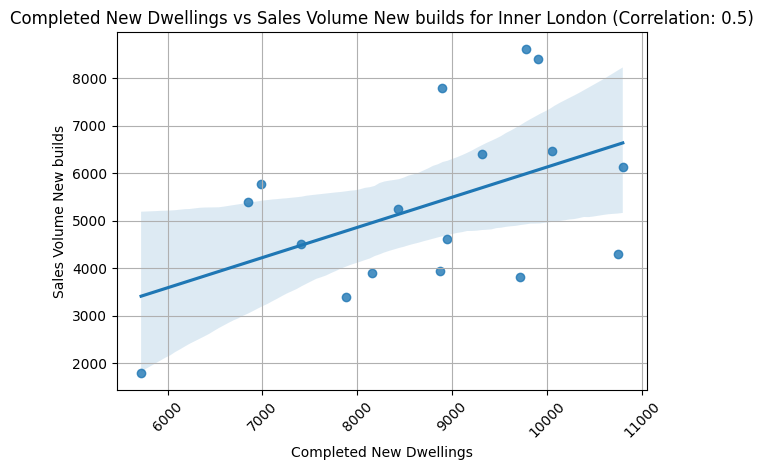

In [93]:
sns.regplot(data = innerlondon, x = 'Completed New Dwellings', y = 'Sales Volume New builds')
plt.title(f"Completed New Dwellings vs Sales Volume New builds for Inner London (Correlation: {correlation_i1:.1f})")
plt.xlabel('Completed New Dwellings')
plt.ylabel('Sales Volume New builds')
plt.xticks(rotation = 45, fontsize = 10)
plt.yticks(rotation = 0, fontsize = 10)
plt.grid(True)
plt.tight_layout()
plt.show()


In [94]:
correlation_i2 = innerlondon['Average Price New Builds'].corr(innerlondon['Completed New Dwellings'])
correlation_i2

-0.03473997280469194

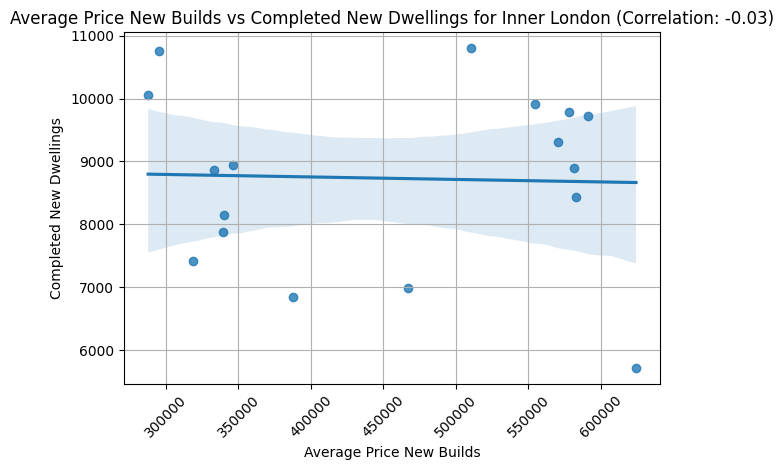

In [95]:
sns.regplot(data = innerlondon, x = 'Average Price New Builds', y = 'Completed New Dwellings')
plt.title(f"Average Price New Builds vs Completed New Dwellings for Inner London (Correlation: {correlation_i2:.2f})")
plt.xlabel('Average Price New Builds')
plt.ylabel('Completed New Dwellings')
plt.xticks(rotation = 45, fontsize = 10)
plt.yticks(rotation = 0, fontsize = 10)
plt.grid(True)
plt.tight_layout()
plt.show()

#### Outer London:

In [96]:
outerlondon_supply.reset_index(inplace = True, drop = True)

In [97]:
outerlondon = {
    'Year': outerlondon_supply['Year'],
    'Region': outerlondon_supply['Region'],
    'Completed New Dwellings': outerlondon_supply['All'],
    'Sales Volume New builds': outerlondon_demand['Total_Sales_New_Builds'],
    'Average Price New Builds': outerlondon_demand['Average_Price_New_Builds']

}
outerlondon = pd.DataFrame(outerlondon)
outerlondon

,Year,Region,Completed New Dwellings,Sales Volume New builds,Average Price New Builds
0,2006,Outer London,11070,6005,240640.0
1,2007,Outer London,14400,4834,262935.0
2,2008,Outer London,13070,4284,266999.0
3,2009,Outer London,10870,3308,234470.0
4,2010,Outer London,7850,3039,244934.0
5,2011,Outer London,9780,3224,255928.0
6,2012,Outer London,12500,4774,261916.0
7,2013,Outer London,9810,5654,277677.0
8,2014,Outer London,11280,6074,323229.0
9,2015,Outer London,13710,7205,360676.0


In [98]:
correlation_o1 = outerlondon['Completed New Dwellings'].corr(outerlondon['Sales Volume New builds'])
correlation_o1

0.25449014353150473

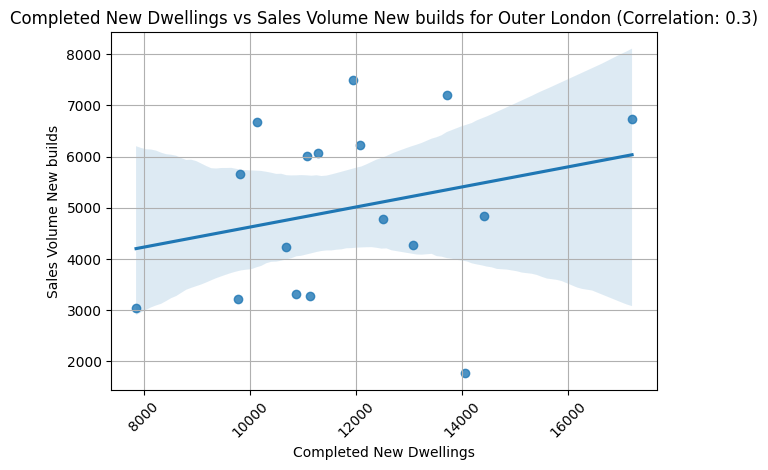

In [99]:
sns.regplot(data = outerlondon, x = 'Completed New Dwellings', y = 'Sales Volume New builds')
plt.title(f"Completed New Dwellings vs Sales Volume New builds for Outer London (Correlation: {correlation_o1:.1f})")
plt.xlabel('Completed New Dwellings')
plt.ylabel('Sales Volume New builds')
plt.xticks(rotation = 45, fontsize = 10)
plt.yticks(rotation = 0, fontsize = 10)
plt.grid(True)
plt.tight_layout()
plt.show()


In [100]:
correlation_o2 = outerlondon['Average Price New Builds'].corr(outerlondon['Completed New Dwellings'])
correlation_o2

0.33222187167474815

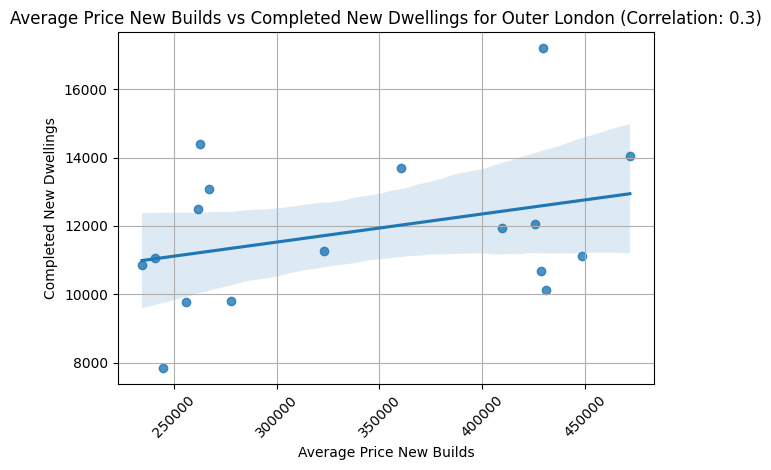

In [101]:
sns.regplot(data = outerlondon, x = 'Average Price New Builds', y = 'Completed New Dwellings')
plt.title(f"Average Price New Builds vs Completed New Dwellings for Outer London (Correlation: {correlation_o2:.1f})")
plt.xlabel('Average Price New Builds')
plt.ylabel('Completed New Dwellings')
plt.xticks(rotation = 45, fontsize = 10)
plt.yticks(rotation = 0, fontsize = 10)
plt.grid(True)
plt.tight_layout()
plt.show()

#### City of London:

In [102]:
cityoflondon = {
    'Year': cityoflondon_supply['Year'],
    'Region': cityoflondon_supply['Region'],
    'Completed New Dwellings': cityoflondon_supply['All'],
    'Sales Volume New builds': cityoflondon_demand['Total_Sales_New_Builds'],
    'Average Price New Builds': cityoflondon_demand['Average_Price_New_Builds']
}
cityoflondon = pd.DataFrame(cityoflondon)
cityoflondon

,Year,Region,Completed New Dwellings,Sales Volume New builds,Average Price New Builds
0,2006,City of London,0,13.0,367232.0
1,2007,City of London,0,13.0,461864.0
2,2008,City of London,0,46.0,462675.0
3,2009,City of London,0,9.0,413185.0
4,2010,City of London,30,43.0,469200.0
5,2011,City of London,0,26.0,489714.0
6,2012,City of London,10,10.0,546079.0
7,2013,City of London,0,232.0,594410.0
8,2014,City of London,160,100.0,736442.0
9,2015,City of London,10,108.0,796634.0


In [103]:
correlation_c1 = cityoflondon['Completed New Dwellings'].corr(cityoflondon['Sales Volume New builds'])
correlation_c1

0.5800782245445202

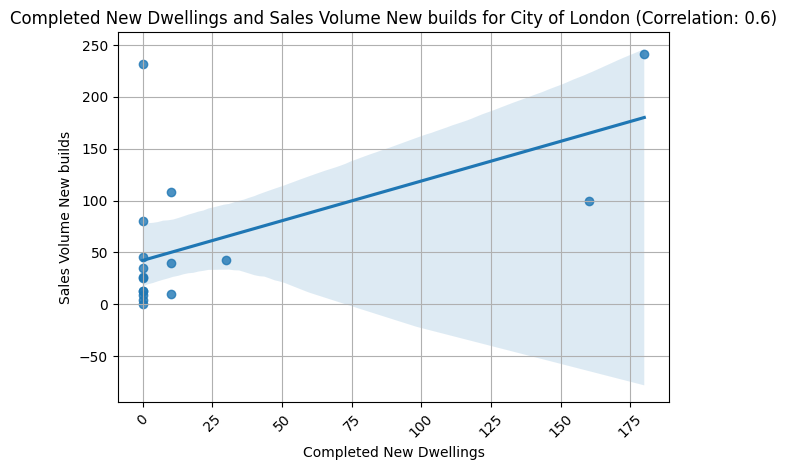

In [104]:
sns.regplot(data = cityoflondon, x = 'Completed New Dwellings', y = 'Sales Volume New builds')
plt.title(f"Completed New Dwellings and Sales Volume New builds for City of London (Correlation: {correlation_c1:.1f})")
plt.xlabel('Completed New Dwellings')
plt.ylabel('Sales Volume New builds')
plt.xticks(rotation = 45, fontsize = 10)
plt.yticks(rotation = 0, fontsize = 10)
plt.grid(True)
plt.tight_layout()
plt.show()

In [105]:
# [:-1] to exclude the 2022 year that includes Nan value for the Average Price of New Builds
correlation_c2 = cityoflondon['Average Price New Builds'][:-1].corr(cityoflondon['Completed New Dwellings'][:-1])
correlation_c2

0.2273367884784183

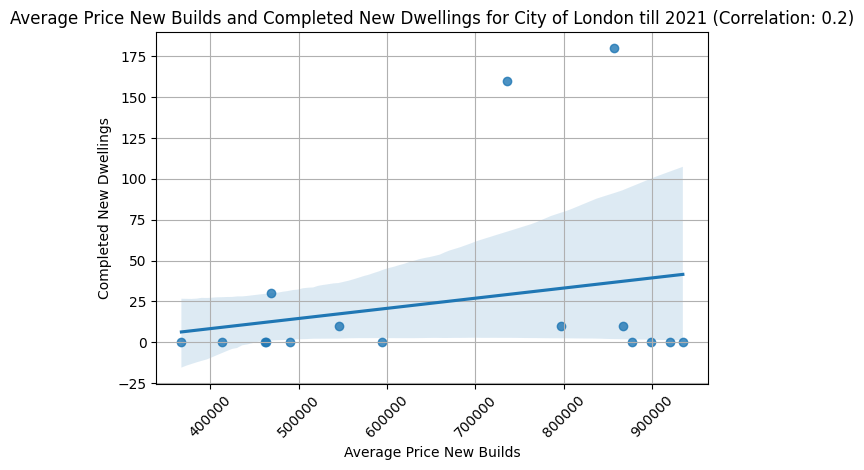

In [106]:
sns.regplot(data = cityoflondon, x = 'Average Price New Builds', y = 'Completed New Dwellings')
plt.title(f"Average Price New Builds and Completed New Dwellings for City of London till 2021 (Correlation: {correlation_c2:.1f})")
plt.xlabel('Average Price New Builds')
plt.ylabel('Completed New Dwellings')
plt.xticks(rotation = 45, fontsize = 10)
plt.yticks(rotation = 0, fontsize = 10)
plt.grid(True)
plt.tight_layout()
plt.show()

## Calculating correlation and visualising results between Total Dwellings Stock, Total Sales and Average Price:

In [107]:
total_dwellings = pd.read_csv('../../Datasets/02_clean_data_files/total_dwellings_by_region.csv')
total_dwellings.drop(['Unnamed: 0'], axis=1, inplace=True)

#### Inner London

In [108]:
innerlondon_total_dwellings = total_dwellings.iloc[16:32].copy()
innerlondon_total_dwellings.reset_index(inplace = True, drop = True)

In [109]:
innerlondon= {
    'Year': innerlondon_total_dwellings['Year'],
    'Region': innerlondon_total_dwellings['Region'],
    'Total Dwellings Stock': innerlondon_total_dwellings['Total Dwelling Stock'],
    'Average Price': innerlondon_demand['Average_Price'][:-1],
    'Total Sales': innerlondon_demand['Total_Sales'][:-1]
}
innerlondon = pd.DataFrame(innerlondon)
innerlondon

,Year,Region,Total Dwellings Stock,Average Price,Total Sales
0,2006,Inner London,1224000,281009.0,68217
1,2007,Inner London,1241000,331026.0,63955
2,2008,Inner London,1255000,335259.0,31370
3,2009,Inner London,1275000,304114.0,30719
4,2010,Inner London,1291000,340155.0,39065
5,2011,Inner London,1300000,353602.0,38181
6,2012,Inner London,1314000,374104.0,39743
7,2013,Inner London,1324000,414744.0,47555
8,2014,Inner London,1333000,491868.0,48901
9,2015,Inner London,1347000,533712.0,44714


In [110]:
correlation_i3 = innerlondon['Total Dwellings Stock'].corr(innerlondon['Total Sales'])
correlation_i3

-0.5256339829233361

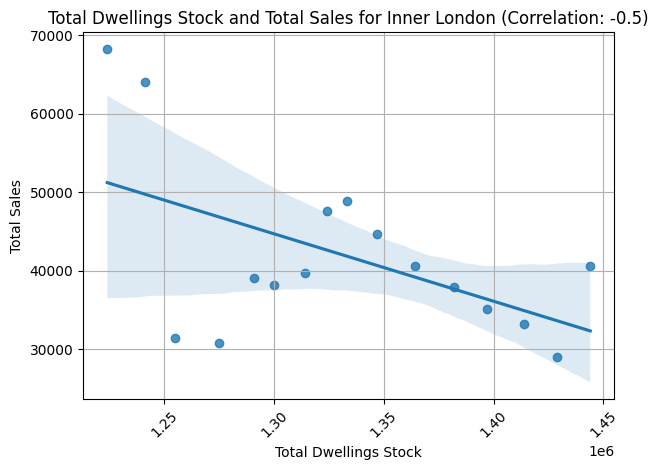

In [111]:
sns.regplot(data = innerlondon, x = 'Total Dwellings Stock', y = 'Total Sales')
plt.title(f"Total Dwellings Stock and Total Sales for Inner London (Correlation: {correlation_i3:.1f})")
plt.xlabel('Total Dwellings Stock')
plt.ylabel('Total Sales')
plt.xticks(rotation = 45, fontsize = 10)
plt.yticks(rotation = 0, fontsize = 10)
plt.grid(True)
plt.tight_layout()
plt.show()

In [112]:
correlation_i4 = innerlondon['Average Price'].corr(innerlondon['Total Dwellings Stock'])
correlation_i4

0.938320841299816

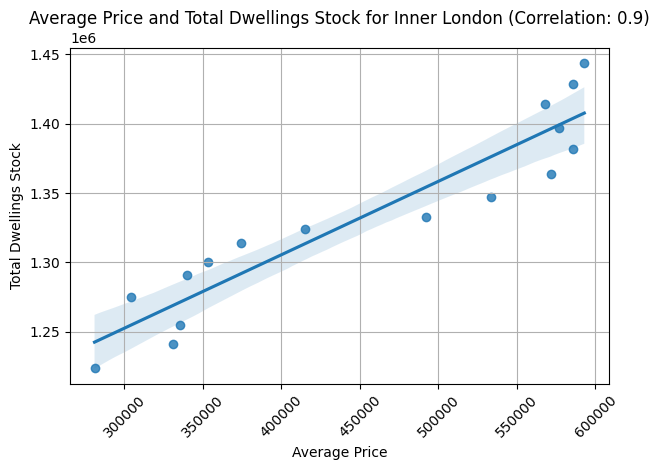

In [113]:
sns.regplot(data = innerlondon, x = 'Average Price', y = 'Total Dwellings Stock')
plt.title(f"Average Price and Total Dwellings Stock for Inner London (Correlation: {correlation_i4:.1f})")
plt.xlabel('Average Price')
plt.ylabel('Total Dwellings Stock')
plt.xticks(rotation = 45, fontsize = 10)
plt.yticks(rotation = 0, fontsize = 10)
plt.grid(True)
plt.tight_layout()
plt.show()


In [114]:
correlation_i5 = innerlondon['Average Price'].corr(innerlondon['Total Sales'])
correlation_i5

-0.38055000735148364

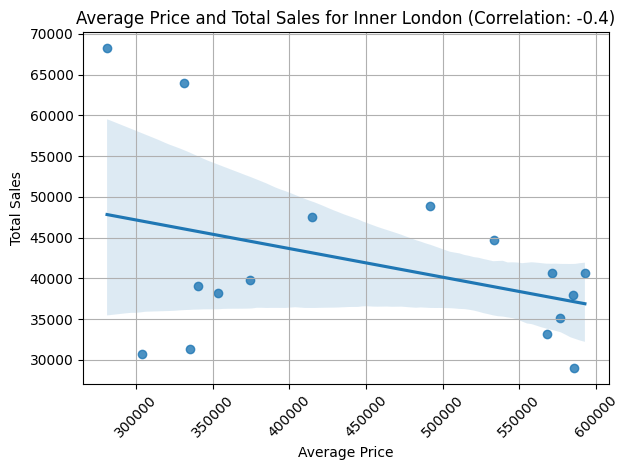

In [115]:
sns.regplot(data = innerlondon, x = 'Average Price', y = 'Total Sales')
plt.title(f"Average Price and Total Sales for Inner London (Correlation: {correlation_i5:.1f})")
plt.xlabel('Average Price')
plt.ylabel('Total Sales')
plt.xticks(rotation = 45, fontsize = 10)
plt.yticks(rotation = 0, fontsize = 10)
plt.grid(True)
plt.tight_layout()
plt.show()


#### Outer London:

In [116]:
outerlondon_total_dwellings = total_dwellings.iloc[32:48].copy()
outerlondon_total_dwellings.reset_index(inplace = True, drop = True)


In [117]:
outerlondon= {
    'Year': outerlondon_total_dwellings['Year'],
    'Region': outerlondon_total_dwellings['Region'],
    'Total Dwellings Stock': outerlondon_total_dwellings['Total Dwelling Stock'],
    'Average Price': outerlondon_demand['Average_Price'][:-1],
    'Total Sales': outerlondon_demand['Total_Sales'][:-1]
}
outerlondon = pd.DataFrame(outerlondon)
outerlondon

,Year,Region,Total Dwellings Stock,Average Price,Total Sales
0,2006,Outer London,1982000,233880.0,103233
1,2007,Outer London,2000000,261401.0,101616
2,2008,Outer London,2016000,262747.0,49551
3,2009,Outer London,2028000,233629.0,44512
4,2010,Outer London,2042000,255640.0,52868
5,2011,Outer London,2050000,258968.0,51860
6,2012,Outer London,2062000,267312.0,54116
7,2013,Outer London,2077000,283136.0,64418
8,2014,Outer London,2089000,328554.0,73048
9,2015,Outer London,2103000,366447.0,71858


In [118]:
correlation_o3 = outerlondon['Total Dwellings Stock'].corr(outerlondon['Total Sales'])
correlation_o3

-0.38584582740886536

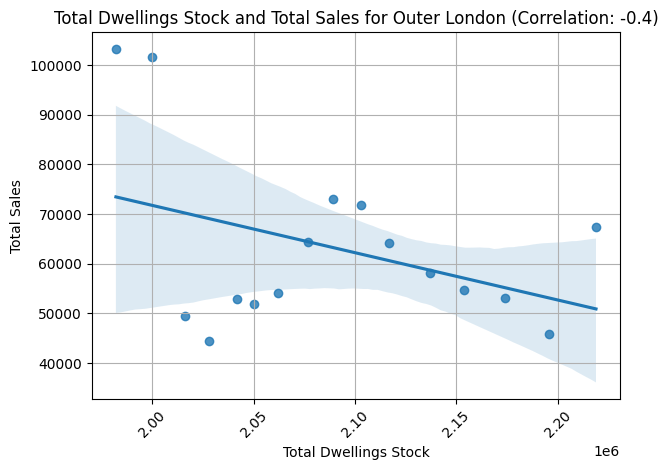

In [119]:
sns.regplot(data = outerlondon, x = 'Total Dwellings Stock', y = 'Total Sales')
plt.title(f"Total Dwellings Stock and Total Sales for Outer London (Correlation: {correlation_o3:.1f})")
plt.xlabel('Total Dwellings Stock')
plt.ylabel('Total Sales')
plt.xticks(rotation = 45, fontsize = 10)
plt.yticks(rotation = 0, fontsize = 10)
plt.grid(True)
plt.tight_layout()
plt.show()

In [120]:
correlation_o4 = outerlondon['Average Price'].corr(outerlondon['Total Dwellings Stock'])
correlation_o4

0.9396442352108743

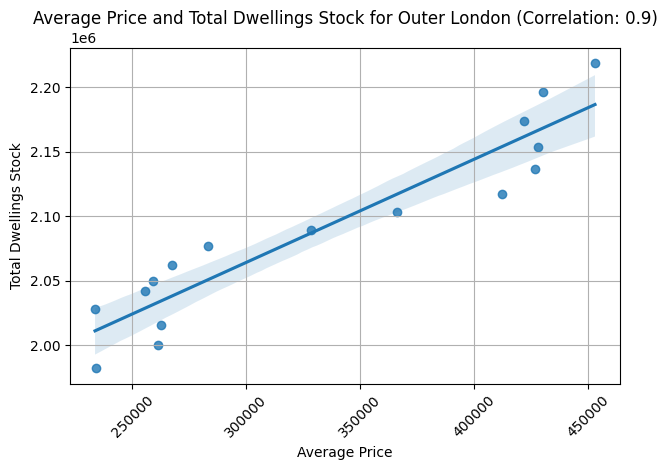

In [121]:
sns.regplot(data = outerlondon, x = 'Average Price', y = 'Total Dwellings Stock')
plt.title(f"Average Price and Total Dwellings Stock for Outer London (Correlation: {correlation_o4:.1f})")
plt.xlabel('Average Price')
plt.ylabel('Total Dwellings Stock')
plt.xticks(rotation = 45, fontsize = 10)
plt.yticks(rotation = 0, fontsize = 10)
plt.grid(True)
plt.tight_layout()
plt.show()

In [122]:
correlation_o5 = outerlondon['Average Price'].corr(outerlondon['Total Sales'])
correlation_o5

-0.2169926489315534

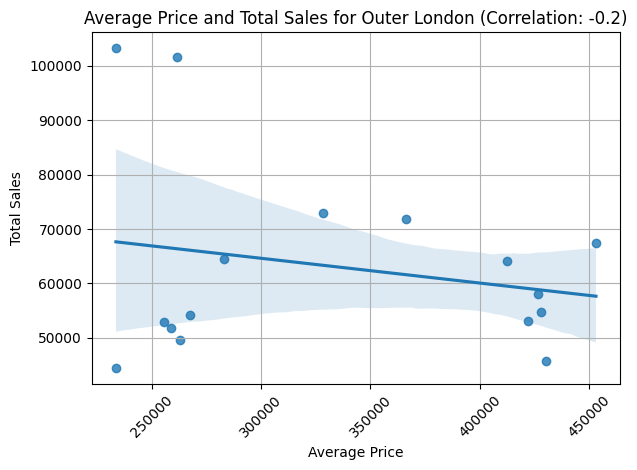

In [123]:
sns.regplot(data = outerlondon, x = 'Average Price', y = 'Total Sales')
plt.title(f"Average Price and Total Sales for Outer London (Correlation: {correlation_o5:.1f})")
plt.xlabel('Average Price')
plt.ylabel('Total Sales')
plt.xticks(rotation = 45, fontsize = 10)
plt.yticks(rotation = 0, fontsize = 10)
plt.grid(True)
plt.tight_layout()
plt.show()

#### City of London:

In [124]:
cityoflondon_total_dwellings = total_dwellings.iloc[:16].copy()
cityoflondon_total_dwellings

,Region,Year,Total Dwelling Stock
0,City of London,2006,5000
1,City of London,2007,5000
2,City of London,2008,5000
3,City of London,2009,5000
4,City of London,2010,5000
5,City of London,2011,6000
6,City of London,2012,6000
7,City of London,2013,6000
8,City of London,2014,6000
9,City of London,2015,6000


In [125]:
cityoflondon= {
    'Year': cityoflondon_total_dwellings['Year'],
    'Region': cityoflondon_total_dwellings['Region'],
    'Total Dwellings Stock': cityoflondon_total_dwellings['Total Dwelling Stock'],
    'Average Price': cityoflondon_demand['Average_Price'][:-1],
    'Total Sales': cityoflondon_demand['Total_Sales'][:-1]
}
cityoflondon = pd.DataFrame(cityoflondon)
cityoflondon

,Year,Region,Total Dwellings Stock,Average Price,Total Sales
0,2006,City of London,5000,338519.0,294
1,2007,City of London,5000,433838.0,270
2,2008,City of London,5000,427297.0,140
3,2009,City of London,5000,383418.0,157
4,2010,City of London,5000,453663.0,236
5,2011,City of London,6000,463931.0,255
6,2012,City of London,6000,525328.0,197
7,2013,City of London,6000,570009.0,433
8,2014,City of London,6000,709385.0,323
9,2015,City of London,6000,760253.0,308


In [126]:
correlation_c3 = cityoflondon['Total Dwellings Stock'].corr(cityoflondon['Total Sales'])
correlation_c3

-0.20863912139414567

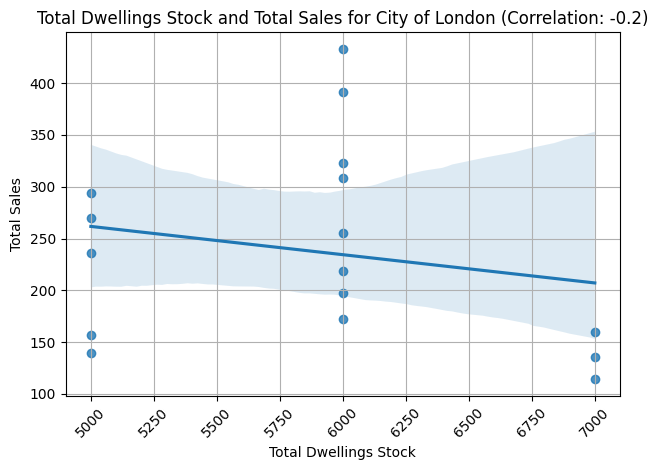

In [127]:
sns.regplot(data = cityoflondon, x = 'Total Dwellings Stock', y = 'Total Sales')
plt.title(f"Total Dwellings Stock and Total Sales for City of London (Correlation: {correlation_c3:.1f})")
plt.xlabel('Total Dwellings Stock')
plt.ylabel('Total Sales')
plt.xticks(rotation = 45, fontsize = 10)
plt.yticks(rotation = 0, fontsize = 10)
plt.grid(True)
plt.tight_layout()
plt.show()

In [128]:
correlation_c4 = cityoflondon['Average Price'].corr(cityoflondon['Total Dwellings Stock'])
correlation_c4

0.8090894342397483

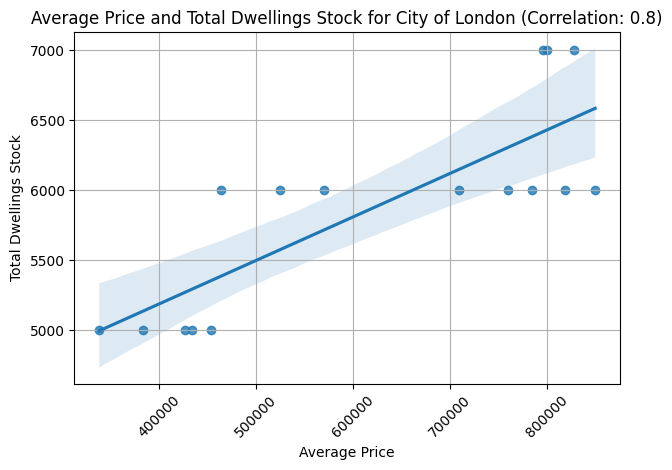

In [129]:
sns.regplot(data = cityoflondon, x = 'Average Price', y = 'Total Dwellings Stock')
plt.title(f"Average Price and Total Dwellings Stock for City of London (Correlation: {correlation_c4:.1f})")
plt.xlabel('Average Price')
plt.ylabel('Total Dwellings Stock')
plt.xticks(rotation = 45, fontsize = 10)
plt.yticks(rotation = 0, fontsize = 10)
plt.grid(True)
plt.tight_layout()
plt.show()

In [130]:
correlation_c5 = cityoflondon['Average Price'].corr(cityoflondon['Total Sales'])
correlation_c5

-0.09306412411579776

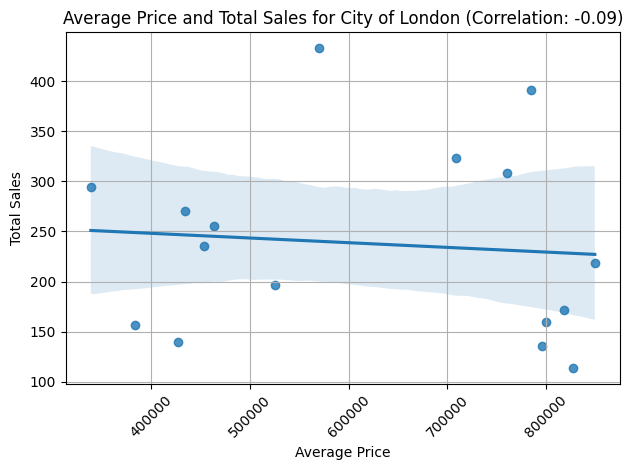

In [131]:
sns.regplot(data = cityoflondon, x = 'Average Price', y = 'Total Sales')
plt.title(f"Average Price and Total Sales for City of London (Correlation: {correlation_c5:.2f})")
plt.xlabel('Average Price')
plt.ylabel('Total Sales')
plt.xticks(rotation = 45, fontsize = 10)
plt.yticks(rotation = 0, fontsize = 10)
plt.grid(True)
plt.tight_layout()
plt.show()

## Interpretation of the results:
### Completed New Dwellings and Total Sales for New Builds:
#### Inner London: 0.5
#### Outer London: 0.3
#### City of London: 0.6
The correlation coefficient is highest in City of London, followed by Inner London and then Outer London. This suggests that for City of London and Inner London completed new dwellings have moderate positive relationship with total sales for new builds. This could reflect a strong demand for newly constructed properties. For Outer London the correlation between new dwellings completed and sales for new builds is weak, meaning that there is an increase in both variables only in certain instances.
### Average Price and Completed New Dwellings for New Builds:
#### Inner London: -0.03
#### Outer London: 0.3
#### City of London: 0.2 (up to 2021)
The correlation coefficients indicate mixed relationships between completed new dwellings and average price for new builds. Outer London has the strongest positive correlation, however still weak. This indicates that in some cases as the average price for new builds tends to rise, completed new dwellings tend to increase as well. A potential reason for this might be that be that construction providers seeing an opportunity for higher profit margins.
For Inner London Region, there's minimal consistent evidence suggesting a link between fluctuations in the average price for new builds and changes in the number of completed new dwellings, due to the correlation of -0.03 been not significant.
### Total Dwellings Stock and Total Sales for All Properties (up to 2021):
#### Inner London: -0.5
#### Outer London: -0.4
#### City of London: -0.2
All regions show negative correlations, Inner London has the highest negative correlation, suggesting that there is a moderately negative relationship between total dwellings stock and all property sales. Outer London has slightly lower negative correlation and City of London has the weakest one out of them all. For Inner and Outer London, this relationship might be influenced by an oversupply situation leading to reduced demand. However, for the City of London, this may not be as applicable due to weaker correlation.

### Average Price and Total Dwellings Stock for All Properties (up to 2021):
#### Inner London: 0.9383
#### Outer London: 0.9396
#### City of London: 0.8
All regions have strong positive correlations, indicating that for all three regions as the average property prices increase, the amount of total dwellings stock available increases as well. Outer and Inner London have slightly higher and very similar correlations. This could potentially reflect that areas with more extensive land areas have higher demand, which leads to increased development and higher property values.
### Average Price and Total Sales for All Properties (up to 2021):
#### Inner London: -0.3
#### Outer London: -0.2
#### City of London: -0.09
Inner and Outer London regions have weak negative correlations, this indicates that in some instances when average price for houses increases, the total sales for all properties decrease. This relationship may be caused by potential buyers becoming more cautious due to an increase in price or affordability problems, leading to a decrease in othe verall property sales. For City of London average price variable does not have any connection with total sales, as the negative correlation of -0.09 is not significant.
<br/>
<br/>
The City of London seems to have a stronger link between new housing supply indicators and sales for new builds. This relationship could be caused by a robust demand for modern properties in this region as the City of London is prominent financial district that continuously attracts professionals and investors.
In Outer London, an increase in completed new dwellings is associated with higher average prices for new builds, suggesting that additional supply of new builds may lead to a higher-priced market segment. Additionally, the negative correlations between total dwellings stock and property sales might indicate that there is an excess of housing supply that results in reduced demand.
It is important to remember, that correlations provide the insights into the relationships between variables, however, does not imply causation.  Other factors can also influence the demand and supply dynamics in the housing market.
